In [1]:
# Import commonly-used data analysis libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Load Statcast swing pitch dataset
df = pd.read_csv("C:/Users/nadle/OneDrive/Documents/csas-2025/Statcast-Swing-Pitch-Data.csv")
df.head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
0,FF,2024-04-02,95.0,-2.01,5.22,"Rocchio, Brayan",677587,622491,single,hit_into_play,...,3,2,5.0,1.0,6.0,1.0,1.32,0.85,-0.85,19.4
1,CH,2024-04-02,88.5,-2.09,4.95,"Rocchio, Brayan",677587,622491,NaN,foul,...,3,2,5.0,1.0,6.0,1.0,2.82,1.40,-1.40,14.4
2,SI,2024-04-02,95.0,-2.02,5.12,"Rocchio, Brayan",677587,622491,NaN,called_strike,...,3,2,5.0,1.0,6.0,1.0,2.37,1.48,-1.48,21.9
3,KC,2024-04-02,80.8,-3.13,5.61,"Rizzo, Anthony",519203,668678,field_out,hit_into_play,...,3,2,5.0,1.0,6.0,1.0,4.61,-0.50,0.50,36.3
4,FF,2024-04-02,95.4,-1.95,5.12,"Hedges, Austin",595978,622491,strikeout,foul_tip,...,3,2,5.0,3.0,6.0,6.0,1.59,1.08,1.08,17.5
5,SI,2024-04-02,90.7,-1.26,5.13,"Ohtani, Shohei",660271,657277,walk,ball,...,3,2,5.0,1.0,5.0,1.0,2.71,1.45,-1.45,27.9
6,SI,2024-04-02,91.8,1.75,4.89,"Casas, Triston",671213,622072,walk,ball,...,3,2,5.0,1.0,7.0,1.0,1.71,0.93,0.93,23.9
7,SI,2024-04-02,94.0,-1.90,4.99,"Hedges, Austin",595978,622491,NaN,called_strike,...,3,2,5.0,3.0,6.0,6.0,2.17,1.60,1.60,15.0
8,SI,2024-04-02,89.9,-1.14,5.01,"Ohtani, Shohei",660271,657277,NaN,ball,...,3,2,5.0,1.0,5.0,1.0,2.79,1.45,-1.45,24.9
9,FF,2024-04-02,93.4,-3.17,5.63,"Rizzo, Anthony",519203,668678,NaN,ball,...,3,2,5.0,1.0,6.0,1.0,1.12,0.59,-0.59,40.0


In [3]:
# Using this link for 2024 MLB Silver Slugger Award finalists: https://www.mlb.com/news/silver-slugger-award-finalists-2024
# Create smaller datasets with at-bat data for each National League shortstop finalist
lindor = df[df['player_name'] == 'Lindor, Francisco']
adames = df[df['player_name'] == 'Adames, Willy']
de_la_cruz = df[df['player_name'] == 'De La Cruz, Elly']

# Lindor won the award for National League shortstops

In [4]:
# Check shape of each dataset
print('Lindor dataset shape:', lindor.shape)
print('Adames dataset shape:', adames.shape)
print('De La Cruz dataset shape:', de_la_cruz.shape)

# Find average number of pitches thrown to each player
print('\nAverage pitches per batter:', np.average([lindor.shape[0], adames.shape[0], de_la_cruz.shape[0]]))

Lindor dataset shape: (2885, 113)
Adames dataset shape: (2747, 113)
De La Cruz dataset shape: (2681, 113)

Average pitches per batter: 2771.0


In [5]:
# Determine number of pitches hit in play
print('Lindor hit_into_play shape:', lindor[lindor['description'] == 'hit_into_play'].shape)
print('Adames hit_into_play shape:', adames[adames['description'] == 'hit_into_play'].shape)
print('De La Cruz hit_into_play shape:', de_la_cruz[de_la_cruz['description'] == 'hit_into_play'].shape)

# Determine proportions of pitches contacted
print('\nPercentage of Lindor hit_into_play pitches:', (lindor[lindor['description'] == 'hit_into_play'].shape[0] / lindor.shape[0]))
print('Percentage of Adames hit_into_play pitches:', (adames[adames['description'] == 'hit_into_play'].shape[0] / adames.shape[0]))
print('Percentage of De La Cruz hit_into_play pitches:', (de_la_cruz[de_la_cruz['description'] == 'hit_into_play'].shape[0] / de_la_cruz.shape[0]))

# Lindor has highest contact rate

Lindor hit_into_play shape: (520, 113)
Adames hit_into_play shape: (437, 113)
De La Cruz hit_into_play shape: (396, 113)

Percentage of Lindor hit_into_play pitches: 0.18024263431542462
Percentage of Adames hit_into_play pitches: 0.15908263560247543
Percentage of De La Cruz hit_into_play pitches: 0.14770607982096232


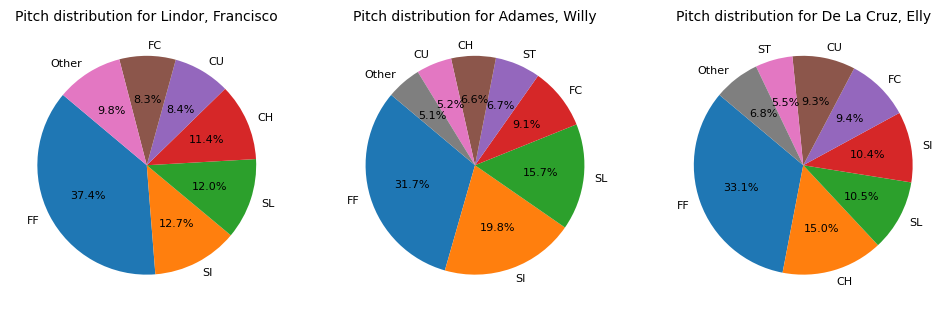

In [6]:
# Create pie charts to visualize pitch type distribution for each batter
datasets = [lindor, adames, de_la_cruz]
titles = ['Pitch distribution for Lindor, Francisco', 'Pitch distribution for Adames, Willy', 'Pitch distribution for De La Cruz, Elly']
threshold = 0.05

fig, axes = plt.subplots(1, 3, figsize = (12, 4))

for i, data in enumerate(datasets):

# Count the value distribution
    value_counts = data['pitch_type'].value_counts()

# Define threshold for grouping smaller distributions
    grouped_counts = value_counts[value_counts / value_counts.sum() >= threshold]
    other_count = value_counts[value_counts / value_counts.sum() < threshold].sum()

    if other_count > 0:
       grouped_counts['Other'] = other_count

# Create the pie chart
    axes[i].pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
    axes[i].set_title(titles[i], fontsize = 10)

# Show the charts
plt.show()

# Lindor faced less unique pitch types that appeared at least 5% of the time but faced the most pitches of the three batters
# Four-seam fastball (FF) distributions: Lindor - 37.4%, Adames - 31.7%, De La Cruz - 33.1%

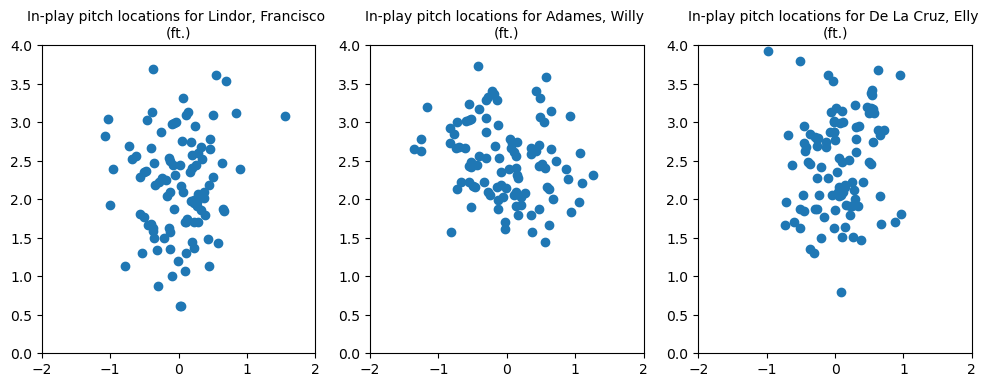

In [7]:
# Create scatter plots of sampled in-play pitch locations
# Each batter has 400-500 in-play pitches, clean up the data by using less but random pitch data
# Note: Pitches labeled 'hit_into_play' signify the end of the at-bat
lindor_sampled = lindor[lindor['description'] == 'hit_into_play'].sample(n = 100, random_state = 42)
adames_sampled = adames[adames['description'] == 'hit_into_play'].sample(n = 100, random_state = 42)
de_la_cruz_sampled = de_la_cruz[de_la_cruz['description'] == 'hit_into_play'].sample(n = 100, random_state = 42)

# Iterate over each batter to create scatter plots
datasets = [lindor_sampled, adames_sampled, de_la_cruz_sampled]
titles = ['In-play pitch locations for Lindor, Francisco \n(ft.)', 'In-play pitch locations for Adames, Willy \n(ft.)', 'In-play pitch locations for De La Cruz, Elly \n(ft.)']

fig, axes = plt.subplots(1, 3, figsize = (12, 4))

for i, data in enumerate(datasets):

# Create each scatter plot
    axes[i].scatter(x = data['plate_x'], y = data['plate_z'])
    axes[i].set_xlim(-2.0, 2.0)
    axes[i].set_ylim(0.0, 4.0)
    axes[i].set_title(titles[i], fontsize = 10)

# Show the charts
plt.show()

In [8]:
# Predetermined center of strike zone is (0.0, 2.0)
# Perform Euclidean distance formula to determine most central in-play pitches
lindor_distance = np.sqrt((0 - lindor_sampled['plate_x']) ** 2 + (2 - lindor_sampled['plate_z']) ** 2)
adames_distance = np.sqrt((0 - adames_sampled['plate_x']) ** 2 + (2 - adames_sampled['plate_z']) ** 2)
de_la_cruz_distance = np.sqrt((0 - de_la_cruz_sampled['plate_x']) ** 2 + (2 - de_la_cruz_sampled['plate_z']) ** 2)

In [9]:
# Sort Lindor's distances for ease of viewing differences in distances
lindor_distance = np.sort(lindor_distance)
print('Sorted distances from center of strike zone from Lindor\n', lindor_distance)

Sorted distances from center of strike zone from Lindor
 [0.12206556 0.13892444 0.16401219 0.17464249 0.17464249 0.1811077
 0.23021729 0.23537205 0.27166155 0.27730849 0.28460499 0.29832868
 0.31016125 0.31400637 0.31622777 0.32557641 0.35846897 0.36235342
 0.36796739 0.37013511 0.37054015 0.38078866 0.38483763 0.39560081
 0.39824616 0.40311289 0.43680659 0.43829214 0.4472136  0.4472136
 0.45044423 0.47539457 0.51419841 0.51971146 0.52009614 0.52325902
 0.54626001 0.55785303 0.55803226 0.55901699 0.55946403 0.58668561
 0.59135438 0.5920304  0.60083276 0.60083276 0.6060528  0.61611687
 0.62128898 0.62425956 0.63953108 0.65306967 0.66098411 0.66211781
 0.6670832  0.67067131 0.67683085 0.70859015 0.73348483 0.7558439
 0.76164296 0.77129761 0.78032045 0.7940403  0.79630396 0.8000625
 0.81320354 0.84291162 0.85603738 0.87800911 0.90553851 0.91760558
 0.93434469 0.9749359  0.97984693 0.98086696 0.98412398 0.99247166
 0.99724621 1.00498756 1.01079177 1.01242284 1.03619496 1.10548632
 1.128051

In [10]:
# Sort Adames's distances for ease of viewing differences in distances
adames_distance = np.sort(adames_distance)
print('Sorted distances from center of strike zone from Adames\n', adames_distance)

Sorted distances from center of strike zone from Adames
 [0.05830952 0.12529964 0.13038405 0.15033296 0.16643317 0.17204651
 0.17691806 0.21023796 0.21213203 0.21260292 0.21540659 0.24738634
 0.26400758 0.28160256 0.29732137 0.30066593 0.31906112 0.34438351
 0.37107951 0.39051248 0.39115214 0.40816663 0.41048752 0.42059482
 0.48507731 0.49648766 0.5186521  0.52952809 0.54341513 0.56727418
 0.57723479 0.59236813 0.60166436 0.61814238 0.62225397 0.6226556
 0.62369865 0.63702433 0.668431   0.6726812  0.68007353 0.68680419
 0.68818602 0.69115845 0.69404611 0.70235319 0.70604532 0.70837843
 0.71309186 0.71505245 0.73437048 0.741485   0.74706091 0.75504967
 0.75716577 0.78160092 0.78492038 0.85146932 0.87658428 0.9060905
 0.91923882 0.92590496 0.92973114 0.93680307 0.95341491 0.9535198
 0.9687621  0.97590983 0.99824847 1.05042848 1.09480592 1.10535062
 1.11986606 1.14127122 1.14690889 1.16275535 1.17239072 1.17686023
 1.18338498 1.22674366 1.23648696 1.24619421 1.24651514 1.29869165
 1.3    

In [11]:
# Sort De La Cruz's distances for ease of viewing differences in distances
de_la_cruz_distance = np.sort(de_la_cruz_distance)
print('Sorted distances from center of strike zone from De La Cruz\n', de_la_cruz_distance)

Sorted distances from center of strike zone from De La Cruz
 [0.07211103 0.07211103 0.09848858 0.10816654 0.14       0.15620499
 0.16763055 0.17888544 0.21260292 0.22803509 0.23769729 0.24738634
 0.26570661 0.28017851 0.29017236 0.29068884 0.29546573 0.29732137
 0.30083218 0.31780497 0.33970576 0.35128336 0.35171011 0.37054015
 0.38209946 0.39       0.46957428 0.47010637 0.47381431 0.48383882
 0.49030603 0.50009999 0.53235327 0.53366656 0.53851648 0.54781384
 0.55470713 0.59033889 0.62481997 0.63007936 0.65215029 0.66121101
 0.66640828 0.67977938 0.69231496 0.69296465 0.70178344 0.72111026
 0.73925638 0.74094534 0.74249579 0.75133215 0.76557168 0.76843998
 0.76843998 0.77       0.79924965 0.80529498 0.82540899 0.8357033
 0.83815273 0.85755466 0.8637708  0.87005747 0.87367042 0.88022724
 0.9202717  0.92703829 0.93600214 0.97862148 0.98671171 0.99247166
 1.00603181 1.0100495  1.01242284 1.02019606 1.0511898  1.05422958
 1.08706026 1.09859001 1.1315918  1.14634201 1.15433964 1.18016948
 1

In [12]:
# Convert NumPy arrays to Pandas DataFrame
nl_ss_distance = {
    'Lindor, Francisco': lindor_distance,
    'Adames, Willy': adames_distance,
    'De La Cruz, Elly': de_la_cruz_distance
}

# Find measures of central tendency and variability for each batter
nl_ss_df = pd.DataFrame(nl_ss_distance)
nl_ss_df.describe()

# While Adames has the smallest distance from the center of the strike zone, Lindor has the lowest mean, median, std, and IQR
# Lindor has lowest pitch distance average (tends closest to center of strike zone) and standard deviation (more consistent at-bats)

,"Lindor, Francisco","Adames, Willy","De La Cruz, Elly"
count,100.000000,100.000000,100.000000
mean,0.716812,0.800285,0.766308
std,0.391037,0.422588,0.444619
min,0.122066,0.058310,0.072111
25%,0.401896,0.493635,0.388025
50%,0.631895,0.724711,0.741721
75%,0.980102,1.150871,1.014366
max,1.897367,1.780253,2.155644


C:\Users\nadle\AppData\Local\Temp\ipykernel_57956\4081114351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lindor_filtered['game_date'] = pd.to_datetime(lindor_filtered['game_date'])
C:\Users\nadle\AppData\Local\Temp\ipykernel_57956\4081114351.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lindor_filtered['Date'] = lindor_filtered['game_date'].dt.date


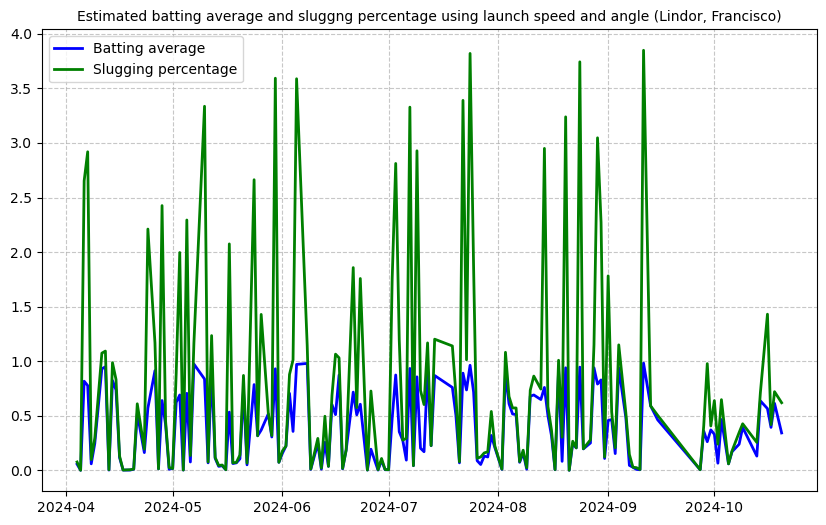

In [ ]:
# Determine if 'easier' pitches (more consistent pitch locations and types) correlate to higher batting average
# Note: 'estimated_ba_using_speedangle' may not be 100% representative of each player's batting average
# Just an estiamte using other data

# Filter dataset so that batting average and slugging percentage are not NaN
lindor_filtered = lindor[~lindor['estimated_ba_using_speedangle'].isna() & ~lindor['estimated_slg_using_speedangle'].isna()]

# Convert 'game_date' to datetime
lindor_filtered['game_date'] = pd.to_datetime(lindor_filtered['game_date'])

# Extract the date part for grouping
lindor_filtered['Date'] = lindor_filtered['game_date'].dt.date

# Keep only the latest row for each date
latest_per_date = lindor_filtered.loc[lindor_filtered.groupby('Date')['game_date'].idxmax()]

# Create time series graph of Lindor's batting average and slugging percentage changes
plt.figure(figsize = (10,6))
plt.plot(latest_per_date['game_date'], latest_per_date['estimated_ba_using_speedangle'], label='Batting average', color="blue", linewidth=2)
plt.plot(latest_per_date['game_date'], latest_per_date['estimated_slg_using_speedangle'], label='Slugging percentage', color='green', linewidth=2)
plt.title("Estimated batting average and sluggng percentage using launch speed and angle (Lindor, Francisco)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

C:\Users\nadle\AppData\Local\Temp\ipykernel_57956\1994768570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adames_filtered['game_date'] = pd.to_datetime(adames_filtered['game_date'])
C:\Users\nadle\AppData\Local\Temp\ipykernel_57956\1994768570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adames_filtered['Date'] = adames_filtered['game_date'].dt.date


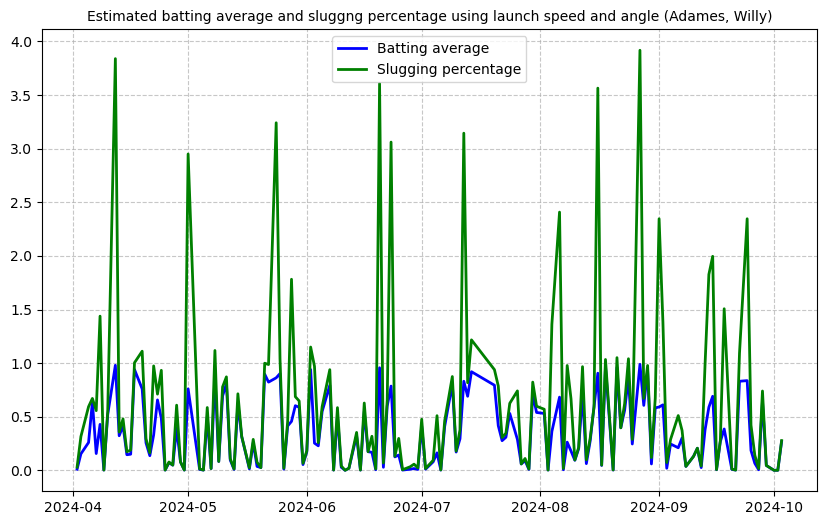

In [14]:
# Filter dataset so that batting average and slugging percentage are not NaN
adames_filtered = adames[~adames['estimated_ba_using_speedangle'].isna() & ~adames['estimated_slg_using_speedangle'].isna()]

# Convert 'game_date' to datetime
adames_filtered['game_date'] = pd.to_datetime(adames_filtered['game_date'])

# Extract the date part for grouping
adames_filtered['Date'] = adames_filtered['game_date'].dt.date

# Keep only the latest row for each date
latest_per_date = adames_filtered.loc[adames_filtered.groupby('Date')['game_date'].idxmax()]

# Create time series graph of Adames's batting average and slugging percentage changes
plt.figure(figsize = (10,6))
plt.plot(latest_per_date['game_date'], latest_per_date['estimated_ba_using_speedangle'], label='Batting average', color="blue", linewidth=2)
plt.plot(latest_per_date['game_date'], latest_per_date['estimated_slg_using_speedangle'], label='Slugging percentage', color='green', linewidth=2)
plt.title("Estimated batting average and sluggng percentage using launch speed and angle (Adames, Willy)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

C:\Users\nadle\AppData\Local\Temp\ipykernel_57956\1995944488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_la_cruz_filtered['game_date'] = pd.to_datetime(de_la_cruz_filtered['game_date'])
C:\Users\nadle\AppData\Local\Temp\ipykernel_57956\1995944488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_la_cruz_filtered['Date'] = de_la_cruz_filtered['game_date'].dt.date


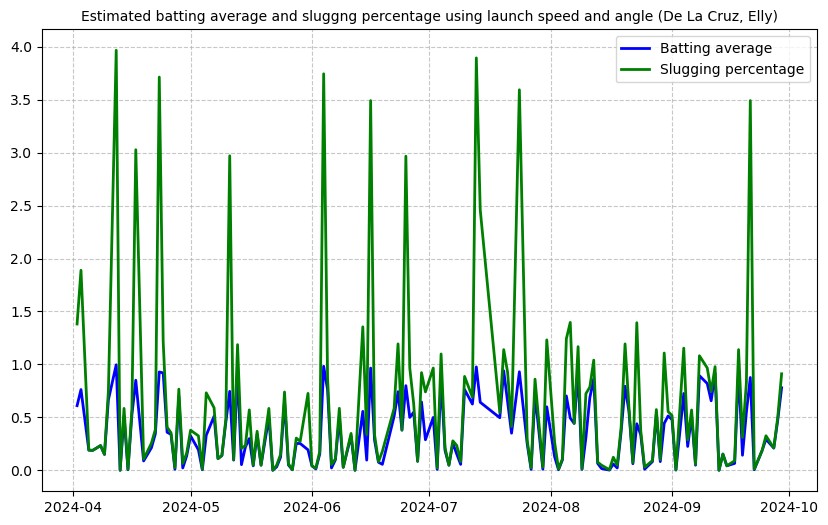

In [19]:
# Filter dataset so that batting average and slugging percentage are not NaN
de_la_cruz_filtered = de_la_cruz[~de_la_cruz['estimated_ba_using_speedangle'].isna() & ~de_la_cruz['estimated_slg_using_speedangle'].isna()]

# Convert 'game_date' to datetime
de_la_cruz_filtered['game_date'] = pd.to_datetime(de_la_cruz_filtered['game_date'])

# Extract the date part for grouping
de_la_cruz_filtered['Date'] = de_la_cruz_filtered['game_date'].dt.date

# Keep only the latest row for each date
latest_per_date = de_la_cruz_filtered.loc[de_la_cruz_filtered.groupby('Date')['game_date'].idxmax()]

# Create time series graph of De La Cruz's batting average and slugging percentage changes
plt.figure(figsize = (10,6))
plt.plot(latest_per_date['game_date'], latest_per_date['estimated_ba_using_speedangle'], label='Batting average', color="blue", linewidth=2)
plt.plot(latest_per_date['game_date'], latest_per_date['estimated_slg_using_speedangle'], label='Slugging percentage', color='green', linewidth=2)
plt.title("Estimated batting average and sluggng percentage using launch speed and angle (De La Cruz, Elly)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

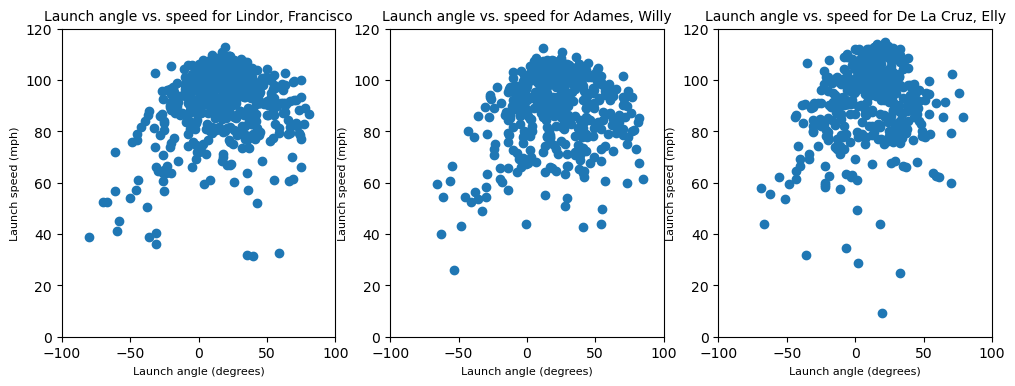

In [36]:
# Map launch angle and exit velocity ('launch_speed') for each batter
# Create scatter plots of sampled in-play pitch locations
datasets = [lindor_filtered, adames_filtered, de_la_cruz_filtered]
titles = ['Launch angle vs. speed for Lindor, Francisco', 'Launch angle vs. speed for Adames, Willy', 'Launch angle vs. speed for De La Cruz, Elly']

fig, axes = plt.subplots(1, 3, figsize = (12, 4))

for i, data in enumerate(datasets):

# Create each scatter plot
    axes[i].scatter(x = data['launch_angle'], y = data['launch_speed'])
    axes[i].set_xlim(-100, 100)
    axes[i].set_ylim(0, 120)
    axes[i].set_xlabel('Launch angle (degrees)', fontsize = 8)
    axes[i].set_ylabel('Launch speed (mph)', fontsize = 8)
    axes[i].set_title(titles[i], fontsize = 10)

# Show the charts
plt.show()

In [37]:
# Describe the launch angle data
nl_ss_angle = {
    'Lindor, Francisco': lindor_filtered['launch_angle'].sample(n = 360, random_state = 42),
    'Adames, Willy': adames_filtered['launch_angle'].sample(n = 360, random_state = 42),
    'De La Cruz, Elly': de_la_cruz_filtered['launch_angle'].sample(n = 360, random_state = 42)
}

# Find measures of central tendency and variability for each batter
nl_ss_df = pd.DataFrame(nl_ss_angle)
nl_ss_df.describe()

# Adames has the highest launch angle and highest average launch angle
# Lindor has the largest standard deviation for launch angles (widest spread in angles swung)

,"Lindor, Francisco","Adames, Willy","De La Cruz, Elly"
count,360.000000,360.000000,360.000000
mean,17.863889,21.513889,9.111111
std,28.221583,26.869432,25.088454
min,-80.000000,-66.000000,-69.000000
25%,3.000000,3.750000,-7.000000
50%,18.000000,24.000000,10.000000
75%,37.000000,39.000000,26.000000
max,81.000000,85.000000,79.000000


In [ ]:
# Describe the launch speed data
nl_ss_speed = {
    'Lindor, Francisco': lindor_filtered['launch_speed'].sample(n = 360, random_state = 42),
    'Adames, Willy': adames_filtered['launch_speed'].sample(n = 360, random_state = 42),
    'De La Cruz, Elly': de_la_cruz_filtered['launch_speed'].sample(n = 360, random_state = 42)
}

# Find measures of central tendency and variability for each batter
nl_ss_df = pd.DataFrame(nl_ss_speed)
nl_ss_df.describe()

# While De La Cruz has the highest average speed, Lindor has highest minimum and median speed

,"Lindor, Francisco","Adames, Willy","De La Cruz, Elly"
count,360.000000,360.000000,360.000000
mean,90.481111,88.502778,91.125000
std,14.575174,14.715410,15.543216
min,31.600000,26.100000,9.400000
25%,83.800000,80.275000,82.650000
50%,94.450000,92.500000,93.100000
75%,100.900000,99.575000,102.250000
max,109.600000,112.300000,114.700000


In [27]:
# Similar to determining measures of center and variability for pitch location distances
# Create DataFrame of each batter's estimated batting average

nl_ss_ba = {
    'Lindor, Francisco': lindor_filtered['estimated_ba_using_speedangle'].sample(n = 360, random_state = 42),
    'Adames, Willy': adames_filtered['estimated_ba_using_speedangle'].sample(n = 360, random_state = 42),
    'De La Cruz, Elly': de_la_cruz_filtered['estimated_ba_using_speedangle'].sample(n = 360, random_state = 42)
}

# Find measures of central tendency and variability for each batter
# Higher batting average measures are considered better
nl_ss_df = pd.DataFrame(nl_ss_ba)
nl_ss_df.describe()

# Interestingly, De La Cruz has higher mean and median and smaller stndard deviation and IQR
# However, De La Cruz has over 100 less in-play hits than Lindor, so skews the data
# Per mlb.com, each player's actual 2024 batting average: Lindor - .273, Adames - .251, De La Cruz - .259

# Consider: comparing two products online (Item 1 has 5.00 rating with 20 reviews while Item 2 has a 4.62 rating with 2,500 rating)
# Item 2 is more desirable because of a larger sample size of reviews

,"Lindor, Francisco","Adames, Willy","De La Cruz, Elly"
count,360.000000,360.000000,360.000000
mean,0.348219,0.337683,0.361786
std,0.313597,0.311496,0.307201
min,0.001000,0.001000,0.001000
25%,0.056250,0.060000,0.077000
50%,0.251000,0.234000,0.275500
75%,0.611000,0.589500,0.577000
max,0.983000,0.989000,0.994000


In [28]:
# Determine if the 'power hitter' archetype can help a player win the Silver Slugger Award
# Create DataFrame of each batter's estimated slugging percentage

nl_ss_slg = {
    'Lindor, Francisco': lindor_filtered['estimated_slg_using_speedangle'].sample(n = 360, random_state = 42),
    'Adames, Willy': adames_filtered['estimated_slg_using_speedangle'].sample(n = 360, random_state = 42),
    'De La Cruz, Elly': de_la_cruz_filtered['estimated_slg_using_speedangle'].sample(n = 360, random_state = 42)
}

# Find measures of central tendency and variability for each batter
# Higher slugging percentage measures are considered better
nl_ss_df = pd.DataFrame(nl_ss_slg)
nl_ss_df.describe()

# Lindor has the lowest mean estimated slugging percentage but highest median and second-highest IQR
# Per mlb.com, each player's actual slugging percentage: Lindor - .500, Adames - .462, De La Cruz - .471

# The bottom line: exit velocities and launch are not representative of a batter's performance
# While Lindor led all three batters in batting average and slugging percentage, it is not represented unless actual batting values are used
# However, Lindor's 'easier' (less diverse and more central) pitches could have helped win the award and skew his batting stats

,"Lindor, Francisco","Adames, Willy","De La Cruz, Elly"
count,360.000000,360.000000,360.000000
mean,0.632822,0.667969,0.642792
std,0.779781,0.869204,0.840980
min,0.001000,0.001000,0.001000
25%,0.076250,0.072500,0.102000
50%,0.340000,0.338000,0.335500
75%,0.905500,0.934500,0.863250
max,3.820000,3.917000,3.953000
